In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

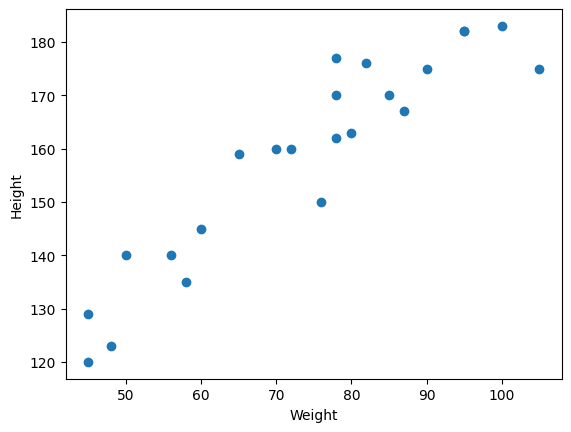

In [4]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
#independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [7]:
X.shape

(23, 1)

In [8]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [9]:
y_train.shape, y_test.shape

((18,), (5,))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

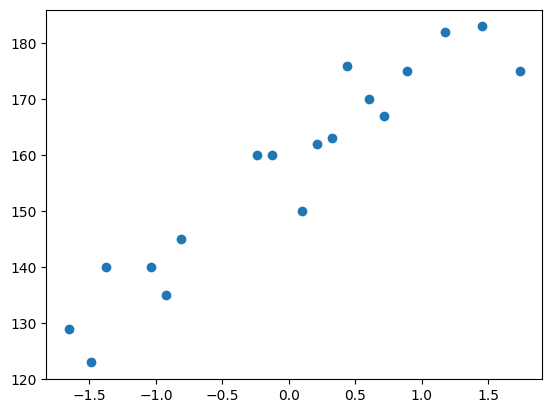

In [11]:
plt.scatter(X_train, y_train)

In [12]:
##build the simple linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [13]:
print("The slope or coefficient of weight:",lr.coef_)
print("Intercept of the weight:",lr.intercept_)

The slope or coefficient of weight: [17.03440872]
Intercept of the weight: 157.5


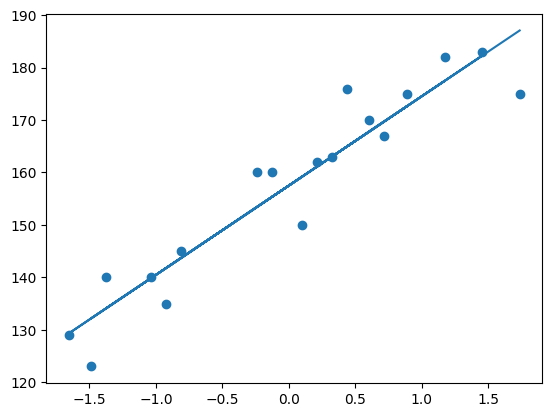

In [19]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train))  ##best fit line

In [15]:
##prediction of the test data
y_pred_test = lr.predict(X_test)

In [16]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

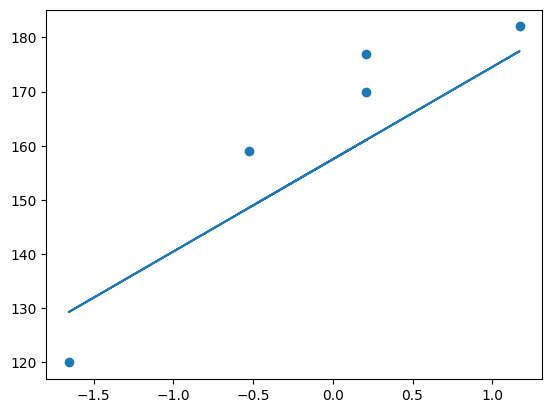

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test,lr.predict(X_test))

In [23]:
##performance metrics
##mae,mse and rmse
##R square and adjusted R square
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print("Score:",score)

Score: 0.776986986042344


In [26]:
##display adjusted R square
1-(1-score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [39]:
##new data point
scale_predicted = scaler.transform([[80]])
scale_predicted

c:\Users\sajin\OneDrive\Desktop\Udemy_DS\myenv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [40]:
print("The height prediction for 80 kg:",lr.predict(scale_predicted))

The height prediction for 80 kg: [163.01076266]


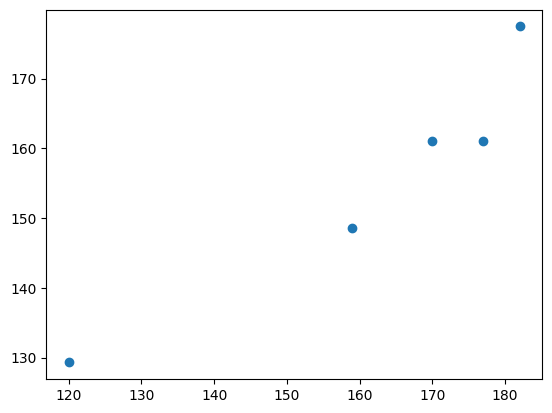

In [41]:
##plot the scatter plot
plt.scatter(y_test,y_pred_test)

In [42]:
##residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\sajin\AppData\Local\Temp\ipykernel_21484\801358546.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

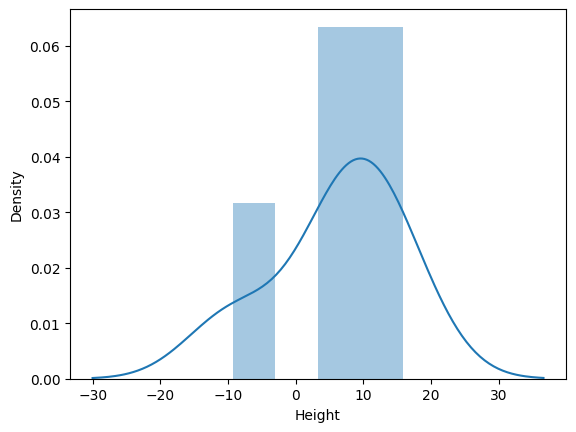

In [44]:
##plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

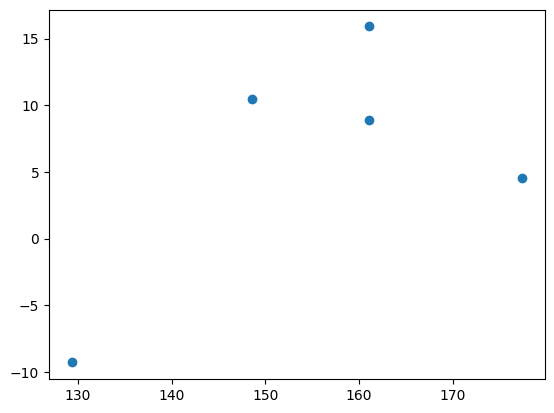

In [48]:
##If we plot the graph based on the y_pred_test and residuals
plt.scatter(y_pred_test, residuals)